<a href="https://colab.research.google.com/github/jumbokh/python_learn/blob/master/notebooks/%E3%80%8COpenAI_Whisper%E8%AA%9E%E9%9F%B3%E8%BE%A8%E8%AD%98%E8%88%87%E7%BF%BB%E8%AD%AF%EF%BC%9ATranscribe_and_Translate_with_OpenAI_Whisper%E4%B8%AD%E6%96%87%E7%89%88%E3%80%8D%E8%A7%A3%E8%AA%AA%E7%89%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

說明影片：

此內容由 [傑森布格](https://medium.com/@jasonboog) 撰寫，[某個Kevin](https://www.youtube.com/@OneOfKevin
/) 翻譯與增加部分註記

OpenAI 的 Whisper 是一種通用語音識別模型，可用於辨識或翻譯語音檔案。 您可以使用此 Google Colab 筆記本在 GPU 上免費使用 Whisper。

感謝 ByteXD 提供此[影片](https://www.youtube.com/watch?v=-KyqrwdTsN0)介紹。

有關 Whisper 的更多信息，您可以訪問[此 GitHub 存儲庫](https://github.com/openai/whisper)。

在開始之前，請將此 Google Colab 筆記本的副本保存到您的 Google Drive。 只需打開“檔案”選單並選擇“在雲端硬碟中儲存副本”。

在 Google Chrome 上打開您的 Colab 筆記本副本，然後按照以下步驟進行辨識和翻譯。

原始連結：https://colab.research.google.com/drive/1WLYoBvA3YNKQ0X2lC9udUOmjK7rZgAwr?usp=sharing#scrollTo=-1pP466t8kpv

By [Jason Boog](https://medium.com/@jasonboog)

OpenAI's Whisper is a general-purpose speech recognition model that you can use to transcribe or translate audio files. You can use Whisper for free on a GPU using this Google Colab notebook.

Thanks to ByteXD for [this video introduction](https://youtu.be/-KyqrwdTsN0).

For more information about Whisper, you can visit [this GitHub repository](https://github.com/openai/whisper).

Before we get started, save a copy of this Google Colab notebook to your Google Drive. Just open the File menu and choose "Save a Copy in Drive."

Open your copy of the Colab notebook on Google Chrome, and follow these steps to transcribe and translate.

# 步驟一：安裝 Whisper Step One: Install Whisper

此步驟將從 Github 上的 OpenAI 存儲庫安裝最新的提交。 只需運行下面的單元即可安裝。

This step will install the latest commit from the OpenAI repository on Github. Just run the cell below to install.

In [ ]:
!pip install git+https://github.com/openai/whisper.git

In [ ]:
!pip install -U openai-whisper

In [ ]:
!pip install --upgrade --no-deps --force-reinstall git+https://github.com/openai/whisper.git

# 步驟二：安裝ffmpeg Step Two: Install ffmpeg

您需要安裝 [ffmpeg](https://ffmpeg.org)，這是一種用於錄製、轉換和流式傳輸音頻和影片的跨平台解決方案。 只需運行單元即可安裝。

You need to install [ffmpeg](https://ffmpeg.org), a cross-platform solution to record, convert and stream audio and video. Just run the cell to install.

In [ ]:
!sudo apt update && sudo apt install ffmpeg

下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑

In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

更新字體快取，其他程式方能使用

In [ ]:
!fc-cache -fv


變更字幕檔權限

In [ ]:
!chmod 777 TaipeiSansTCBeta-Regular.ttf

下載完成後將字型移至font資料夾

In [ ]:
!cp *.ttf /usr/local/share/fonts

# 步驟三：上傳你的檔案 Step Three: Upload Your File

打開 Colab 筆記本左邊的資料夾圖案。將您要的 辨識.mp3 拖到“檔案”部分。

這會將語音檔上傳到您的 Google 雲端硬碟。 這是您上傳檔案後的樣子：

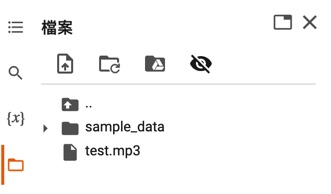

by 某個Kevin備註：**請確認你的檔案儲存在其他位置。系統會在這個執行階段終止時刪除其檔案。**

Open the file folder on the left-hand corner of your Colab notebook. Drag the .mp3 you would like to transcribe into the "Files" section.

This will upload the audio to your your Google Drive. Here's what it looks like once you've uploaded a file:


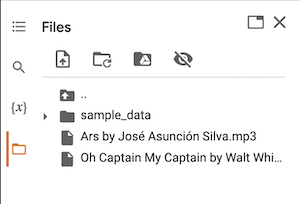




步驟三plus：透過Google drive 上傳你的檔案 如果檔案太大可透過google drive 上傳檔案需輸入file id

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import re

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
full_url = input("請輸入完整的 Google Drive 網址: ")
match = re.search(r'/file/d/([a-zA-Z0-9-_]+)', full_url)
file_id = match.group(1)
#file_id = input("請輸入file_id: ")
#file_id = '1fZ8U1sn1BLOc4eIJaMIxHLZjAS7YSJgR'
downloaded = drive.CreateFile({'id': file_id})
# 從下載的文件中獲取原始文件名（包括副檔名）
original_filename = downloaded['title']

# 使用這個文件名保存文件到 Colab 環境
downloaded.GetContentFile(original_filename)

print(f"檔案 '{original_filename}' 已保存到 Colab 環境中")

步驟三plus：透過Google drive 上傳你的檔案 多檔案可透過輸入 folder ID 下載整個資料夾檔案

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import re

# 認證並創建 PyDrive 客戶端
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 輸入 Google Drive 文件夾的完整 URL
full_url = input("請輸入完整的 Google Drive 文件夾網址: ")
match = re.search(r'/folders/([a-zA-Z0-9-_]+)', full_url)
if match:
    folder_id = match.group(1)
    print(f"文件夾 ID: {folder_id}")

    # 創建一個查詢字符串，用來找到文件夾下的所有文件
    query = f"'{folder_id}' in parents and trashed=false"

    # 使用文件夾 ID 列出所有文件
    try:
        file_list = drive.ListFile({'q': query}).GetList()
        # 下載文件夾中的每個文件
        for file in file_list:
            print(f'正在從 Google Drive 下載文件 {file["title"]}')  # 顯示下載信息
            file.GetContentFile(file['title'])  # 下載文件
        print("所有文件已下載到 Colab 環境。")
    except Exception as e:
        print(f"訪問文件時出錯: {e}")
else:
    print("未能解析文件夾 ID，請檢查網址格式是否正確。")


# 步驟四：辨識 Step Four: Transcribe

要辨識 .mp3，只需將 .mp3 檔案名稱複製並貼上到下面的命令行中，然後運行該單元格。

不要忘記引號！

by 某個Kevin備註：
1. 如果只辨識一到一半就結束，代表檔案可能沒有完整傳完，請重新傳一次。（上傳的時候下方會有檔案名稱，旁邊會有個小圓圈，轉完才算傳完）
2. **推薦使用medium就好，辨識已經夠準確，大約花原本檔案一半甚至四分之一左右的時間即可辨識完畢**。當然你也可以使用large模型，但large模型速度花的時間是medium模型的兩倍，詳情可看OpenAI GitHub說明：https://github.com/openai/whisper
3. 因不明原因，我測試large模型前30秒內容會消失。相同檔案medium模型執行正常，但large模型就異常
4. 用medium模型有時候也是會異常，例如我有遇過前面內容都正常，但在某個時間點後就故障了，辨識出來的東西變成重複內容，後來我重新執行一次又正常了（沒有更換檔案）。所以如果有遇到異常不妨重新執行一次看看

To transcribe an .mp3, simply copy and paste the title of your .mp3 file into the command line below and run the cell.

Don't forget the quotation marks!



In [ ]:
!whisper --model


by 某個Kevin備註：然後我發現用網址也是可以啦，像下面這樣

---



In [ ]:
!whisper "WiNG Migration Partner Webinar APAC.mp4" --model medium --language en

In [ ]:
whisper_command = f'!whisper "{original_filename}" --model medium --language en'

# 步驟五：翻譯 Step Five: Translate

要翻譯 .mp3，只需將 .mp3 的檔名複製並粘貼到下面的命令行中，然後運行該單元格。

您可以根據需要在命令行中更改語言，英語是默認輸出。 不要忘記引號！

注意：作者使用 Colab Pro 訂閱創建並成功運行了此筆記本的每一步。

在基本的 Google Colab 計劃中，除了“第五步”之外的所有步驟都有效。 最後一步在基本計劃上不斷出現“運行時中斷”錯誤。

To translate an .mp3, simply copy and paste the title of your .mp3 file into the command line below and run the cell.

You can change the language as needed in the command line, and English is the default output. Don't forget the quotation marks!

Note: I created and successfully ran every step of this notebook with my Colab Pro subscription.

On the basic Google Colab plan, all the steps worked except "Step Five." This final step kept getting a "Runtime discontinued" error on the basic plan.

In [ ]:
!whisper "Generative AI the Ansible way.mp4" --language en --model large

In [ ]:
!whisper "Behind-the-Scenes at KICK Sauber F1® with Extreme Academy - Part 1 LinkedIn.mp4" --language zh --model medium --initial_prompt="繁體中文"

In [ ]:
!whisper --help

用ffpmeg 將字幕檔燒入至影片裡

In [ ]:
!ls -al

In [ ]:
!ffmpeg -i 'On-Demand - Mastering Wing Migration Enhance Your Network s Intelligence and Efficiency Extreme Networks.mp4' \
-vf "subtitles='On-Demand - Mastering Wing Migration Enhance Your Network s Intelligence and Efficiency Extreme Networks_dual.srt:force_style=PrimaryColour=0xCCCCCC,BackColour=0x000000,OutlineColour=0x000000,BorderStyle=1,Outline=1,Shadow=0,MarginV=10,Fontsize=14'" \
-c:a copy 'On-Demand - Mastering Wing Migration Enhance Your Network s Intelligence and Efficiency Extreme Networks_dual.mp4'


In [ ]:
!ffmpeg --help
#!ffmpeg -i 'Intro – Extreme Academy.mp4' -vf "subtitles='Intro – Extreme Academy.zh-TW-translation.srt:force_style='PrimaryColour=0xCCCCCC,BackColour=0x000000,OutlineColour=0x000000,BorderStyle=1,Outline=1,Shadow=0,MarginV=10,Fontsize=14'" -c:a copy 'Intro – Extreme Academy1.mp4'

In [ ]:
!fc-list
!pwd
!cat /etc/fonts/fonts.conf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 授權條款 License

麻省理工授權條款

版權所有 (c) 2022 Jason Boog

特此免費授予獲得本軟體和相關檔案（“軟體”）副本的任何人不受限制地處理本軟體的權限，包括但不限於使用、複製、修改、合併的權利 、發布、分發、再許可和/或出售軟體的副本，並允許獲得軟體的人這樣做，但須滿足以下條件：

上述版權聲明和本許可聲明應包含在本軟體的所有副本或重要部分中。

本軟體“按原樣”提供，不提供任何明示或暗示的保證，包括但不限於對適銷性、特定用途的適用性和非侵權的保證。 在任何情況下，作者或版權持有人均不對任何索賠、損害或其他責任負責，無論是在合同訴訟、侵權行為還是其他方面，由軟體或軟體的使用或其他交易引起、由軟體引起或與之相關軟體。

MIT License

Copyright (c) 2022 Jason Boog

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.